In [134]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rc('axes',unicode_minus=False)

from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

#X 컬럼 값 변경
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split

In [135]:
dataset = pd.read_csv('data/MultipleLinearRegressionData.csv')
dataset.head()

,hour,absent,place,score
0,0.5,3,Home,10
1,1.2,4,Library,8
2,1.8,2,Cafe,14
3,2.4,0,Cafe,26
4,2.6,2,Home,22


In [136]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
X.shape, y.shape

((21, 3), (21,))

In [137]:
#[2] 컬럼값 변경
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(drop='first'),[2])],
    remainder='passthrough'
)
X_trans = ct.fit_transform(X)
X_trans[:5], X[:5]

(array([[1.0, 0.0, 0.5, 3],
        [0.0, 1.0, 1.2, 4],
        [0.0, 0.0, 1.8, 2],
        [0.0, 0.0, 2.4, 0],
        [1.0, 0.0, 2.6, 2]], dtype=object),
 array([[0.5, 3, 'Home'],
        [1.2, 4, 'Library'],
        [1.8, 2, 'Cafe'],
        [2.4, 0, 'Cafe'],
        [2.6, 2, 'Home']], dtype=object))

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.2, random_state=0)

In [139]:
reg = LinearRegression()
reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [140]:
#X_test의 실제값
X_test, y_test

(array([[1.0, 0.0, 4.5, 5],
        [0.0, 0.0, 6.1, 1],
        [1.0, 0.0, 1.0, 10],
        [0.0, 1.0, 1.2, 4],
        [0.0, 0.0, 5.8, 0]], dtype=object),
 array([ 38,  68, 100,   8,  72]))

In [141]:
#X_test의 예측값 확인
X_test, reg.predict(X_test)

(array([[1.0, 0.0, 4.5, 5],
        [0.0, 0.0, 6.1, 1],
        [1.0, 0.0, 1.0, 10],
        [0.0, 1.0, 1.2, 4],
        [0.0, 0.0, 5.8, 0]], dtype=object),
 array([40.63891345, 64.50927238,  2.14157682, 13.97551232, 62.32395224]))

In [142]:
#기울기구하기([홈,라이브러리,카페(0),공부시간,결석])
reg.coef_

array([-4.93423459,  0.24204683,  9.88478747, -0.7801161 ])

In [143]:
m1 = reg.coef_[0] #집에서 공부시
m2 = reg.coef_[1] #도서관에서 공부시
m3 = 0 #카페에서 공부시
m4 = reg.coef_[2] #공부시간
m5 = reg.coef_[3] #결석시수
m1,m2,m3,m4,m5


(np.float64(-4.934234590992162),
 np.float64(0.24204682531530075),
 0,
 np.float64(9.884787466302566),
 np.float64(-0.7801160994696441))

In [144]:
#변수간의 기울기
x = ['집', '도서관','카페','공부시간','결석횟수']
y = [m1,m2,m3,m4,m5]

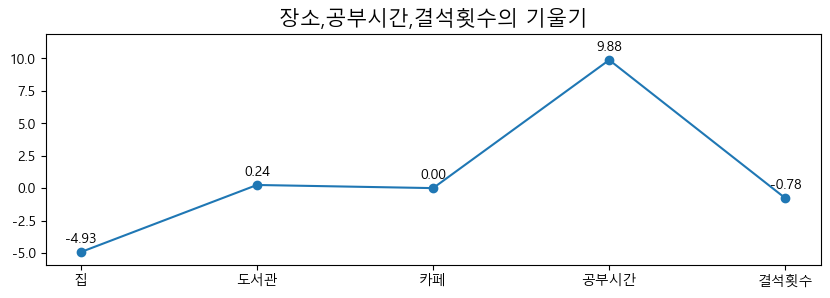

In [145]:
plt.figure(figsize=(10,3))
plt.plot(x,y,marker='o')
plt.title('장소,공부시간,결석횟수의 기울기', size=15)
plt.ylim(min(y)-1, max(y)+2)
for idx, m in enumerate(y):
    plt.text(idx, m+0.7, f'{m:.2f}', ha='center')
plt.show()

In [146]:
#설정에 따른 예측값 - 카페에서 9시간 공부, 1일 결석시 점수?
reg.predict([[0,0,9,1]])

array([93.17515603])

In [147]:
#설정에 따른 예측값 - 도서관 9시간 공부, 1일 결석시 점수?
reg.predict([[0,1,9,1]])

array([93.41720286])

In [148]:
#설정에 따른 예측값 - 집 9시간 공부, 1일 결석시 점수?
reg.predict([[1,0,9,1]])

array([88.24092144])

In [1]:
#다중선형회귀모델 생성 함수
def model_linear():
    import pandas as pd
    dataset = pd.read_csv('data/MultipleLinearRegressionData.csv')
    X = dataset.iloc[:, :-1].values
    y = dataset.iloc[:, -1].values
    
    from sklearn.compose import ColumnTransformer
    from sklearn.preprocessing import OneHotEncoder
    from sklearn.model_selection import train_test_split

    ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(drop='first'),[2])],
                    remainder='passthrough')
    X_trans = ct.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.2, random_state=0)
    reg = LinearRegression()
    reg.fit(X_train, y_train)

    return reg
    

In [150]:
model = model_linear()
model.predict([[1,0,9,1]]), reg.predict([[1,0,9,1]])

(array([88.24092144]), array([88.24092144]))

In [151]:
#일반-숫자로 전환된 변수확인을 위한 추가 설정
places = {'home':[1,0], 'library':[0,1], 'cafe':[0,0]}
places['home']
places.get('library','none')

[0, 1]

In [152]:
place='library'
place = places.get(place)
# place, place[0], place[1]
place1=place[0]
place2=place[1]
hour=9
absent=1
model.predict([[place1, place2, hour, absent]])

array([93.41720286])

In [153]:
def predict(place, hour, absent):
    places = {'home':[1,0], 'library':[0,1], 'cafe':[0,0]}
    p1 = places.get(place)[0]
    p2 = places.get(place)[1]
    model = model_linear()
    pred = model.predict([[p1, p2, hour, absent]])
    print(f'장소:{place}, 공부시간:{hour}, 결석횟수:{absent}, 예상점수:{pred[0]:.2f}')

In [154]:
predict('cafe',3,0)

장소:cafe, 공부시간:3, 결석횟수:0, 예상점수:34.65


In [155]:
df_y = pd.DataFrame(y_train)
df_y.columns=['실제점수']
df_y.head()

,실제점수
0,60
1,72
2,90
3,42
4,100


In [156]:
y_pred = reg.predict(X_train)
df_pred = pd.DataFrame(y_pred)
df_pred.columns = ['예측점수']
df_pred.head()

,예측점수
0,55.821326
1,65.739798
2,89.463288
3,43.784903
4,104.082106


In [157]:
df_join = df_y.join(df_pred)
df_join.head()

,실제점수,예측점수
0,60,55.821326
1,72,65.739798
2,90,89.463288
3,42,43.784903
4,100,104.082106


In [158]:
df_x = pd.DataFrame(X_train)
df_x.columns=['장소1','장소2','공부시간','결석횟수']
df_x.head()

,장소1,장소2,공부시간,결석횟수
0,0.0,0.0,5.3,2
1,0.0,1.0,6.2,1
2,0.0,1.0,8.6,1
3,0.0,1.0,3.9,0
4,0.0,1.0,10.0,0


In [159]:
df = df_x.join(df_join)
df['장소1']=df['장소1'].astype(int)
df['장소2']=df['장소2'].astype(int)
df.head()

,장소1,장소2,공부시간,결석횟수,실제점수,예측점수
0,0,0,5.3,2,60,55.821326
1,0,1,6.2,1,72,65.739798
2,0,1,8.6,1,90,89.463288
3,0,1,3.9,0,42,43.784903
4,0,1,10.0,0,100,104.082106


In [160]:
def place(x):
    x1 = x.iloc[0]
    x2 = x.iloc[1]
    if(x1==1) & (x2==0):
        return 'house'
    elif(x1==0) & (x2==1):
        return 'library'
    elif(x1==0) & (x2==0):
        return 'cafe'

In [161]:
df['장소'] = df[['장소1', '장소2']].apply(place, axis=1)
df.head()

,장소1,장소2,공부시간,결석횟수,실제점수,예측점수,장소
0,0,0,5.3,2,60,55.821326,cafe
1,0,1,6.2,1,72,65.739798,library
2,0,1,8.6,1,90,89.463288,library
3,0,1,3.9,0,42,43.784903,library
4,0,1,10.0,0,100,104.082106,library


In [162]:
xticks = [f"{df.loc[x,'장소']}(시간:{df.loc[x,'공부시간']}, 결석:{df.loc[x,'결석횟수']})"
           for x in df.index]
xticks

['cafe(시간:5.3, 결석:2)',
 'library(시간:6.2, 결석:1)',
 'library(시간:8.6, 결석:1)',
 'library(시간:3.9, 결석:0)',
 'library(시간:10.0, 결석:0)',
 'house(시간:2.6, 결석:2)',
 'cafe(시간:1.8, 결석:2)',
 'house(시간:3.2, 결석:0)',
 'cafe(시간:7.2, 결석:2)',
 'cafe(시간:5.0, 결석:1)',
 'library(시간:4.4, 결석:0)',
 'house(시간:8.4, 결석:1)',
 'cafe(시간:2.4, 결석:0)',
 'house(시간:0.5, 결석:3)',
 'house(시간:6.9, 결석:4)',
 'library(시간:6.0, 결석:3)']

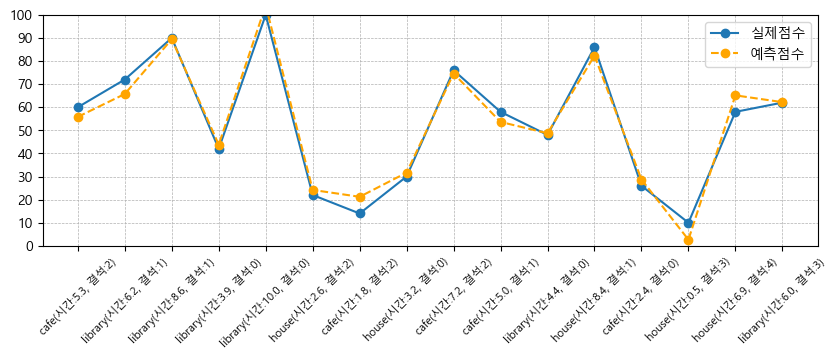

In [163]:
plt.figure(figsize=(10,3))
plt.plot(df.index, df['실제점수'], marker='o', label='실제점수')
plt.plot(df.index, df['예측점수'], marker='o', label='예측점수', color="orange", ls='--')
xticks = [f"{df.loc[x,'장소']}(시간:{df.loc[x,'공부시간']}, 결석:{df.loc[x,'결석횟수']})"
           for x in df.index]
plt.xticks(df.index, xticks, size=8, rotation=45)
plt.grid(True, ls='--', lw=0.5)
plt.ylim(0,100)
plt.yticks([y for y in range(0,101,10)])
plt.legend()
plt.show()

In [165]:
X_test

array([[1.0, 0.0, 4.5, 5],
       [0.0, 0.0, 6.1, 1],
       [1.0, 0.0, 1.0, 10],
       [0.0, 1.0, 1.2, 4],
       [0.0, 0.0, 5.8, 0]], dtype=object)